# Capstone 3 Preprocessing and Modeling

# Contents
1. [Imports](#1.-Imports)
2. [Load Plant Averages Data](#2.-Load-Plant-Averages-Data)
3. [Plant 1](#3.-Plant-1)
    * [3.1 Train-Test-Split](#3.1-Train-Test-Split)
    * [3.2 Dummy Regression using Mean (Baseline)](#3.2-Dummy-Regression-using-Mean-(Baseline))
    * [3.3 Simple Linear Regression](#3.3-Simple-Linear-Regression)
    * [3.4 Pipelines](#3.4-Pipelines)
        * [3.4.1 Linear Regression Model Pipeline](#3.4.1-Linear-Regression-Model-Pipeline)
        * [3.4.2 Random Forest Model Pipeline](#3.4.2-Random-Forest-Model-Pipeline)
        * [3.4.3 Gradient Boosting Model Pipeline](#3.4.3-Gradient-Boosting-Model-Pipeline)
4. [Plant 2](#4.-Plant-2)
    * [4.1 Train-Test-Split](#4.1-Train-Test-Split)
    * [4.2 Dummy Regression using Mean (Baseline)](#4.2-Dummy-Regression-using-Mean-(Baseline))
    * [4.3 Simple Linear Regression](#4.3-Simple-Linear-Regression)
    * [4.4 Pipelines](#4.4-Pipelines)
        * [4.4.1 Linear Regression Model Pipeline](#4.4.1-Linear-Regression-Model-Pipeline)
        * [4.4.2 Random Forest Model Pipeline](#4.4.2-Random-Forest-Model-Pipeline)
        * [4.4.3 Gradient Boosting Model Pipeline](#4.4.3-Gradient-Boosting-Model-Pipeline)
    * [4.5 Neural Network](#4.5-Neural-Network)
5. [Final Model Selection](#5.-Final-Model-Selection)
    * [5.1 Plant 1 Model Performance](#5.1-Plant-1-Model-Performance)
    * [5.2 Plant 2 Model Performance](#5.2-Plant-2-Model-Performance)
    * [5.3 Metrics Evaluation](#5.3-Metrics-Evaluation)
6. [Save Models](#6.-Save-Models)
7. [Modeling Scenario](#7.-Modeling-Scenario)

##  1. Imports

In [1]:
import os
import re
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Plant Averages Data

In [2]:
plant1_avg = pd.read_csv('../data/plant1_avg.csv')
plant2_avg = pd.read_csv('../data/plant2_avg.csv')

In [3]:
plant1_avg.date_time = pd.to_datetime(plant1_avg.date_time)
plant1_avg.set_index('date_time',inplace=True)

plant2_avg.date_time = pd.to_datetime(plant2_avg.date_time)
plant2_avg.set_index('date_time',inplace=True)

## 3. Plant 1

### 3.1 Train-Test-Split

In [4]:
# X1 = plant1_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
# y1 = plant1_avg[['delta_daily_yield2']]

# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

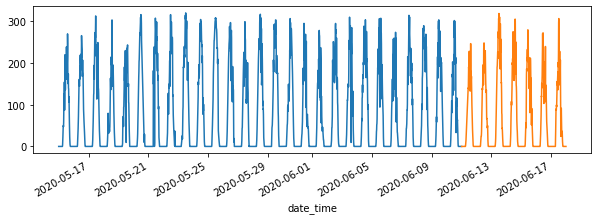

In [5]:
date_split = pd.Timestamp('2020-06-11 00:00:00')

train1 = plant1_avg.loc[:date_split]
test1 = plant1_avg.loc[date_split:]

plt.figure(figsize=(10,3))
train1.delta_daily_yield2.plot()
test1.delta_daily_yield2.plot();

In [6]:
X_train1 = train1[['dc_power','ambient_temperature','module_temperature','irradiation']]
y_train1 = train1[['delta_daily_yield2']]

X_test1 = test1[['dc_power','ambient_temperature','module_temperature','irradiation']]
y_test1 = test1[['delta_daily_yield2']]

### 3.2 Dummy Regression using Mean (Baseline)

In [179]:
from sklearn.dummy import DummyRegressor

dummy_mean1 = DummyRegressor(strategy='mean')
dummy_mean1.fit(X_train1, y_train1)
dummy_mean1.constant_

array([[79.97127411]])

In [180]:
y_tr_dummy1 = dummy_mean1.predict(X_train1)
y_te_dummy1 = dummy_mean1.predict(X_test1)

y_tr_dummy1[0], y_te_dummy1[0]

(79.97127410672424, 79.97127410672424)

In [181]:
r2_score(y_train1, y_tr_dummy1), r2_score(y_test1, y_te_dummy1)

(0.0, -0.017622990772426572)

In [183]:
mean_absolute_error(y_train1, y_tr_dummy1), mean_absolute_error(y_test1, y_te_dummy1)

(89.58966417263859, 80.43460840187804)

In [184]:
mean_squared_error(y_train1, y_tr_dummy1), mean_squared_error(y_test1, y_te_dummy1)

(14079.401729711615, 7987.355474847166)

### 3.3 Simple Linear Regression

In [7]:
lm = LinearRegression()

lm.fit(X_train1, y_train1)
y_pred1 = lm.predict(X_test1)

# lm.score(X_test1, y_test1)
print(r2_score(y_test1, y_pred1))
print(lm.coef_, lm.intercept_)

0.9849549916423417
[[   0.19576015   -4.21303616    5.32018372 -120.67689568]] [-16.09450924]


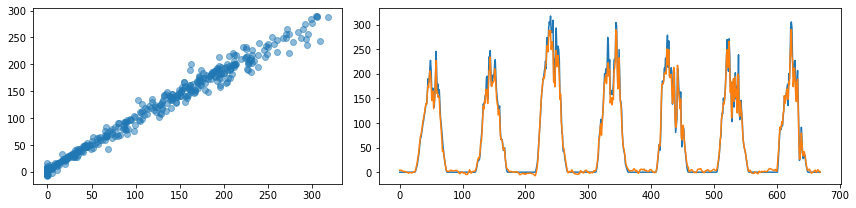

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,3),gridspec_kw={'width_ratios':[2,3]})
ax1.scatter(y_test1,y_pred1,alpha=0.5)
ax2.plot(np.array(y_test1))
ax2.plot(y_pred1)
plt.tight_layout();

### 3.4 Pipelines

#### 3.4.1 Linear Regression Model Pipeline

In [9]:
lr_pipe1 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    LinearRegression())

In [10]:
lr_pipe1.fit(X_train1, y_train1)

y_tr_pred1 = lr_pipe1.predict(X_train1)
y_te_pred1 = lr_pipe1.predict(X_test1)

In [11]:
r2_score(y_train1, y_tr_pred1), r2_score(y_test1, y_te_pred1)

(0.980259921377492, 0.9849549916423418)

In [12]:
mean_absolute_error(y_train1, y_tr_pred1), mean_absolute_error(y_test1, y_te_pred1)

(7.354547659833833, 6.703783420771646)

In [13]:
mean_squared_error(y_train1, y_tr_pred1), mean_squared_error(y_test1, y_te_pred1)

(194.3854971018035, 118.08875287246413)

In [14]:
# Cross-Validation

In [15]:
cv_results1 = cross_validate(lr_pipe1, X_train1, y_train1, cv=5)

cv_scores1 = cv_results1['test_score']
cv_scores1

array([0.97330302, 0.98016777, 0.98575324, 0.97181879, 0.98313521])

In [16]:
np.mean(cv_scores1), np.std(cv_scores1)

(0.9788356067606708, 0.005439855215592663)

#### 3.4.2 Random Forest Model Pipeline

In [17]:
rf_pipe1 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=123))

In [18]:
rf_pipe1.fit(X_train1, y_train1)

rf_y_tr_pred1 = rf_pipe1.predict(X_train1)
rf_y_te_pred1 = rf_pipe1.predict(X_test1)

In [19]:
r2_score(y_train1, rf_y_tr_pred1), r2_score(y_test1, rf_y_te_pred1)

(0.9971649534382483, 0.9796534013561329)

In [20]:
mean_absolute_error(y_train1, rf_y_tr_pred1), mean_absolute_error(y_test1, rf_y_te_pred1)

(2.2622610725372967, 6.3522699743935265)

In [21]:
mean_squared_error(y_train1, rf_y_tr_pred1), mean_squared_error(y_test1, rf_y_te_pred1)

(27.917413387832397, 159.70110497331882)

In [22]:
# Cross-Validation

In [23]:
rf_default_cv_results1 = cross_validate(rf_pipe1, X_train1, y_train1, cv=5)

rf_cv_scores1 = rf_default_cv_results1['test_score']
rf_cv_scores1

array([0.96896786, 0.97609394, 0.98451955, 0.96967933, 0.98093204])

In [24]:
np.mean(rf_cv_scores1), np.std(rf_cv_scores1)

(0.9760385454032268, 0.006104276008317874)

In [25]:
# Hyperparameter search using GridSearchCV

In [26]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=5)]
rf_grid_params1 = {'randomforestregressor__n_estimators': n_est,
                   'randomforestregressor__criterion': ['squared_error'],
                   'randomforestregressor__bootstrap': [True],
                   'randomforestregressor__min_samples_split': [2,4,8],
                   'randomforestregressor__max_depth': [3,6,9],
                   'standardscaler': [StandardScaler()],
                   'simpleimputer__strategy': ['mean', 'median']}

rf_grid_cv1 = GridSearchCV(rf_pipe1, param_grid=rf_grid_params1, cv=5, n_jobs=-1)

In [27]:
rf_grid_cv1.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__bootstrap': [True],
                         'randomforestregressor__criterion': ['squared_error'],
                         'randomforestregressor__max_depth': [3, 6, 9],
                         'randomforestregressor__min_samples_split': [2, 4, 8],
                         'randomforestregressor__n_estimators': [10, 31, 100,
                                                                 316, 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler()]})

In [28]:
rf_grid_cv1.best_params_

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': 9,
 'randomforestregressor__min_samples_split': 8,
 'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [29]:
rf_best_cv_results1 = cross_validate(rf_grid_cv1.best_estimator_, X_train1, y_train1, cv=5)
rf_best_scores1 = rf_best_cv_results1['test_score']
rf_best_scores1

array([0.97025881, 0.97654528, 0.98479941, 0.96994606, 0.98114523])

In [30]:
np.mean(rf_best_scores1), np.std(rf_best_scores1)

(0.9765389585207161, 0.005871278113551984)

#### 3.4.3 Graident Boosting Model Pipeline

In [31]:
gb_pipe1 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingRegressor(random_state=123))

In [32]:
gb_pipe1.fit(X_train1, y_train1)

gb_y_tr_pred1 = gb_pipe1.predict(X_train1)
gb_y_te_pred1 = gb_pipe1.predict(X_test1)

In [33]:
r2_score(y_train1, gb_y_tr_pred1), r2_score(y_test1, gb_y_te_pred1)

(0.989734095087101, 0.9828166734842964)

In [34]:
mean_absolute_error(y_train1, gb_y_tr_pred1), mean_absolute_error(y_test1, gb_y_te_pred1)

(4.777064790777835, 5.966369504550759)

In [35]:
mean_squared_error(y_train1, gb_y_tr_pred1), mean_squared_error(y_test1, gb_y_te_pred1)

(101.09093625485124, 134.8724806395269)

In [36]:
# Cross-Validation

In [37]:
gb_default_cv_results1 = cross_validate(gb_pipe1, X_train1, y_train1, cv=5)

gb_cv_scores1 = gb_default_cv_results1['test_score']
gb_cv_scores1

array([0.97136431, 0.97608755, 0.98581925, 0.96847511, 0.9802821 ])

In [38]:
np.mean(gb_cv_scores1), np.std(gb_cv_scores1)

(0.9764056630835805, 0.006197617605918793)

In [39]:
# Hyperparameter search using GridSearchCV

In [40]:
gb_grid_params1 = {'gradientboostingregressor__n_estimators': [100,150,200],
                   'gradientboostingregressor__max_depth': [1,3,5],
                   'gradientboostingregressor__learning_rate': [0.01,0.1,1],
                   'gradientboostingregressor__loss': ['squared_error'],
                   'standardscaler': [StandardScaler(), None],
                   'simpleimputer__strategy': ['mean', 'median']}

gb_grid_cv1 = GridSearchCV(gb_pipe1, param_grid=gb_grid_params1, cv=5, n_jobs=-1)

In [41]:
gb_grid_cv1.fit(X_train1, y_train1.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.01, 0.1,
                                                                      1],
                         'gradientboostingregressor__loss': ['squared_error'],
                         'gradientboostingregressor__max_depth': [1, 3, 5],
                         'gradientboostingregressor__n_estimators': [100, 150,
                                                                     200],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [42]:
gb_grid_cv1.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'squared_error',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [43]:
gb_best_cv_results1 = cross_validate(gb_grid_cv1.best_estimator_, X_train1, y_train1, cv=5)
gb_best_scores1 = gb_best_cv_results1['test_score']
gb_best_scores1

array([0.97136431, 0.97608755, 0.98581925, 0.96847511, 0.9802821 ])

In [44]:
np.mean(gb_best_scores1), np.std(gb_best_scores1)

(0.9764056630835805, 0.006197617605918793)

## 4. Plant 2

### 4.1 Train-Test-Split

In [45]:
# X2 = plant2_avg[['dc_power','ambient_temperature','module_temperature','irradiation']]
# y2 = plant2_avg[['delta_daily_yield2']]

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

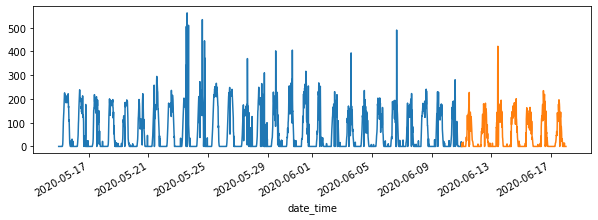

In [46]:
date_split = pd.Timestamp('2020-06-11 00:00:00')

train2 = plant2_avg.loc[:date_split]
test2 = plant2_avg.loc[date_split:]

plt.figure(figsize=(10,3))
train2.delta_daily_yield2.plot()
test2.delta_daily_yield2.plot();

In [47]:
X_train2 = train2[['dc_power','ambient_temperature','module_temperature','irradiation']]
y_train2 = train2[['delta_daily_yield2']]

X_test2 = test2[['dc_power','ambient_temperature','module_temperature','irradiation']]
y_test2 = test2[['delta_daily_yield2']]

### 4.2 Dummy Regression using Mean (Baseline)

In [185]:
from sklearn.dummy import DummyRegressor

dummy_mean2 = DummyRegressor(strategy='mean')
dummy_mean2.fit(X_train2, y_train2)
dummy_mean2.constant_

array([[63.64603428]])

In [186]:
y_tr_dummy2 = dummy_mean2.predict(X_train2)
y_te_dummy2 = dummy_mean2.predict(X_test2)

y_tr_dummy2[0], y_te_dummy2[0]

(63.646034275779954, 63.646034275779954)

In [187]:
r2_score(y_train2, y_tr_dummy2), r2_score(y_test2, y_te_dummy2)

(0.0, -0.06323325540207336)

In [188]:
mean_absolute_error(y_train2, y_tr_dummy2), mean_absolute_error(y_test2, y_te_dummy2)

(72.50966175258576, 60.37015886371536)

In [189]:
mean_squared_error(y_train2, y_tr_dummy2), mean_squared_error(y_test2, y_te_dummy2)

(6997.03606517055, 4402.931529439193)

### 4.3 Simple Linear Regression

In [48]:
lm = LinearRegression()

lm.fit(X_train2, y_train2)
y_pred2 = lm.predict(X_test2)

# lm.score(X_test2, y_test2)
print(r2_score(y_test2, y_pred2))
print(lm.coef_, lm.intercept_)

0.8452164474158899
[[ 2.49597094e-01 -3.62986777e-02  1.53592885e+00 -6.97221281e+01]] [-34.88383982]


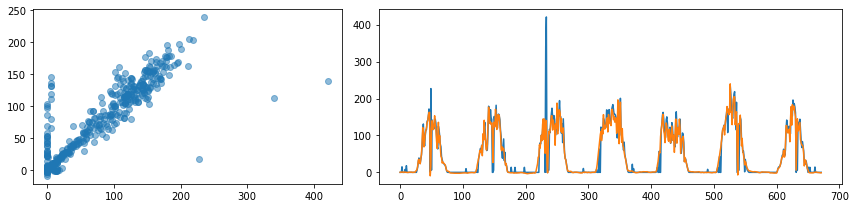

In [49]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,3),gridspec_kw={'width_ratios':[2,3]})
ax1.scatter(y_test2,y_pred2,alpha=0.5)
ax2.plot(np.array(y_test2))
ax2.plot(y_pred2)
plt.tight_layout();

### 4.4 Pipelines

#### 4.4.1 Linear Regression Model Pipeline

In [50]:
lr_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    LinearRegression())

In [51]:
lr_pipe2.fit(X_train2, y_train2)

y_tr_pred2 = lr_pipe2.predict(X_train2)
y_te_pred2 = lr_pipe2.predict(X_test2)

In [52]:
r2_score(y_train2, y_tr_pred2), r2_score(y_test2, y_te_pred2)

(0.8398191524658676, 0.8452164474158899)

In [53]:
mean_absolute_error(y_train2, y_tr_pred2), mean_absolute_error(y_test2, y_te_pred2)

(12.518927098310025, 10.35163710002827)

In [54]:
mean_squared_error(y_train2, y_tr_pred2), mean_squared_error(y_test2, y_te_pred2)

(1120.79116714591, 640.9707187473838)

In [55]:
# Cross-Validation

In [56]:
cv_results2 = cross_validate(lr_pipe2, X_train2, y_train2, cv=5)

cv_scores2 = cv_results2['test_score']
cv_scores2

array([0.94024758, 0.75713679, 0.8242655 , 0.85994152, 0.84655146])

In [57]:
np.mean(cv_scores2), np.std(cv_scores2)

(0.8456285716088535, 0.059068851195021185)

#### 4.4.2 Random Forest Model Pipeline

In [58]:
rf_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=123))

In [59]:
rf_pipe2.fit(X_train2, y_train2)

rf_y_tr_pred2 = rf_pipe2.predict(X_train2)
rf_y_te_pred2 = rf_pipe2.predict(X_test2)

In [60]:
r2_score(y_train2, rf_y_tr_pred2), r2_score(y_test2, rf_y_te_pred2)

(0.973294106009317, 0.8430320947652652)

In [61]:
mean_absolute_error(y_train2, rf_y_tr_pred2), mean_absolute_error(y_test2, rf_y_te_pred2)

(5.176020875915605, 10.749010491317438)

In [62]:
mean_squared_error(y_train2, rf_y_tr_pred2), mean_squared_error(y_test2, rf_y_te_pred2)

(186.86210340543013, 650.0162928093166)

In [63]:
# Cross-Validation

In [64]:
rf_default_cv_results2 = cross_validate(rf_pipe2, X_train2, y_train2, cv=5)

rf_cv_scores2 = rf_default_cv_results2['test_score']
rf_cv_scores2

array([0.92604376, 0.72927334, 0.79110084, 0.85211858, 0.82854921])

In [65]:
np.mean(rf_cv_scores2), np.std(rf_cv_scores2)

(0.8254171464710947, 0.06522228340328479)

In [66]:
# Hyperparameter search using GridSearchCV

In [67]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=5)]

rf_grid_params2 = {'randomforestregressor__n_estimators': n_est,
                   'randomforestregressor__criterion': ['squared_error'],
                   'randomforestregressor__bootstrap': [True],
                   'randomforestregressor__min_samples_split': [2,4,8],
                   'randomforestregressor__max_depth': [3,6,9],   
                   'standardscaler': [StandardScaler()],
                   'simpleimputer__strategy': ['mean', 'median']}

rf_grid_cv2 = GridSearchCV(rf_pipe2, param_grid=rf_grid_params2, cv=5, n_jobs=-1)

In [68]:
rf_grid_cv2.fit(X_train2, y_train2.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__bootstrap': [True],
                         'randomforestregressor__criterion': ['squared_error'],
                         'randomforestregressor__max_depth': [3, 6, 9],
                         'randomforestregressor__min_samples_split': [2, 4, 8],
                         'randomforestregressor__n_estimators': [10, 31, 100,
                                                                 316, 1000],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler()]})

In [69]:
rf_grid_cv2.best_params_

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': 3,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 316,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [70]:
rf_best_cv_results2 = cross_validate(rf_grid_cv2.best_estimator_, X_train2, y_train2, cv=5)
rf_best_scores2 = rf_best_cv_results2['test_score']
rf_best_scores2

array([0.93646327, 0.7450194 , 0.82350078, 0.84827121, 0.83126463])

In [71]:
np.mean(rf_best_scores2), np.std(rf_best_scores2)

(0.8369038597976942, 0.06114816463005332)

#### 4.4.3 Graident Boosting Model Pipeline

In [72]:
gb_pipe2 = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingRegressor(random_state=123))

In [73]:
gb_pipe2.fit(X_train2, y_train2)

gb_y_tr_pred2 = gb_pipe2.predict(X_train2)
gb_y_te_pred2 = gb_pipe2.predict(X_test2)

In [74]:
r2_score(y_train2, gb_y_tr_pred2), r2_score(y_test2, gb_y_te_pred2)

(0.9177248561537432, 0.8412958267354014)

In [75]:
mean_absolute_error(y_train2, gb_y_tr_pred2), mean_absolute_error(y_test2, gb_y_te_pred2)

(10.389890210890684, 10.959866107699725)

In [76]:
mean_squared_error(y_train2, gb_y_tr_pred2), mean_squared_error(y_test2, gb_y_te_pred2)

(575.6821487593534, 657.206313638146)

In [77]:
# Cross-Validation

In [78]:
gb_default_cv_results2 = cross_validate(gb_pipe2, X_train2, y_train2, cv=5)

gb_cv_scores2 = gb_default_cv_results2['test_score']
gb_cv_scores2

array([0.93010421, 0.72415501, 0.8042306 , 0.85305279, 0.83952756])

In [79]:
np.mean(gb_cv_scores2), np.std(gb_cv_scores2)

(0.8302140358020932, 0.06709702679316285)

In [80]:
# Hyperparameter search using GridSearchCV

In [81]:
gb_grid_params2 = {'gradientboostingregressor__n_estimators': [100,150,200],
                   'gradientboostingregressor__max_depth':[1],
                   'gradientboostingregressor__learning_rate':[0.1],
                   'gradientboostingregressor__loss': ['squared_error'],
                   'standardscaler': [StandardScaler(), None],
                   'simpleimputer__strategy': ['mean', 'median']}

gb_grid_cv2 = GridSearchCV(gb_pipe2, param_grid=gb_grid_params2, cv=5, n_jobs=-1)

In [82]:
gb_grid_cv2.fit(X_train2, y_train2.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.1],
                         'gradientboostingregressor__loss': ['squared_error'],
                         'gradientboostingregressor__max_depth': [1],
                         'gradientboostingregressor__n_estimators': [100, 150,
                                                                     200],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler': [StandardScaler(), None]})

In [83]:
gb_grid_cv2.best_params_

{'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'squared_error',
 'gradientboostingregressor__max_depth': 1,
 'gradientboostingregressor__n_estimators': 100,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [84]:
gb_best_cv_results2 = cross_validate(gb_grid_cv2.best_estimator_, X_train2, y_train2, cv=5)
gb_best_scores2 = gb_best_cv_results2['test_score']
gb_best_scores2

array([0.93685251, 0.75159863, 0.82287914, 0.85127307, 0.83821275])

In [85]:
np.mean(gb_best_scores2), np.std(gb_best_scores2)

(0.8401632189278067, 0.05936072313371919)

### 4.5 Neural Network

In [86]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor

n_cols = np.array(X_train2).shape[1]

early_stopping_monitor = EarlyStopping(patience=2)

nn_model = Sequential()
nn_model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(50, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
nn_model.fit(X_train2, y_train2, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])

Epoch 1/100


2022-07-05 09:27:58.245658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


57/57 [==============================] - 1s 4ms/step - loss: 1594.3876 - mse: 1594.3876 - val_loss: 792.5620 - val_mse: 792.5620
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 1367.8488 - mse: 1367.8488 - val_loss: 789.7794 - val_mse: 789.7794
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 1348.5525 - mse: 1348.5525 - val_loss: 851.6420 - val_mse: 851.6420
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 1346.7285 - mse: 1346.7285 - val_loss: 790.8089 - val_mse: 790.8089


In [87]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 15,701
Trainable params: 15,701
Non-trainable params: 0
_________________________________________________________________


In [88]:
nn_tr_pred = nn_model.predict(X_train2)
nn_te_pred = nn_model.predict(X_test2)

21/21 [==============================] - 0s 1ms/step


In [89]:
r2_score(y_train2, nn_tr_pred), r2_score(y_test2, nn_te_pred)

(0.8324143387669026, 0.8343582253212687)

In [90]:
mean_absolute_error(y_train2, nn_tr_pred), mean_absolute_error(y_test2, nn_te_pred)

(14.299141227477977, 12.334438980077358)

In [91]:
mean_squared_error(y_train2, nn_tr_pred), mean_squared_error(y_test2, nn_te_pred)

(1172.6029156534364, 685.9354601822081)

## 5. Final Model Selection

In [92]:
mse_scorer = make_scorer(mean_squared_error)

### 5.1 Plant 1 Model Performance

#### Linear Regression Model Performance

In [93]:
lr_results1 = cross_validate(lr_pipe1, X_test1, y_test1, 
                            scoring=mse_scorer, cv=5, n_jobs=-1)

In [94]:
lr_mse_mean1 = np.mean(lr_results1['test_score'])
lr_mse_std1 = np.std(lr_results1['test_score'])
lr_mse_mean1, lr_mse_std1

(90.18422391044844, 26.79405571072703)

#### Random Forest Model Performance

In [95]:
rf_results1 = cross_validate(rf_grid_cv1.best_estimator_, X_test1, y_test1.values.ravel(), 
                            scoring=mse_scorer, cv=5, n_jobs=-1)

In [96]:
rf_mse_mean1 = np.mean(rf_results1['test_score'])
rf_mse_std1 = np.std(rf_results1['test_score'])
rf_mse_mean1, rf_mse_std1

(88.59630287919894, 31.825544180925966)

#### Graident Boosting Model Performance

In [97]:
gb_results1 = cross_validate(gb_grid_cv1.best_estimator_, X_test1, y_test1.values.ravel(),
                            scoring=mse_scorer, cv=5, n_jobs=-1)

In [98]:
gb_mse_mean1 = np.mean(gb_results1['test_score'])
gb_mse_std1 = np.std(gb_results1['test_score'])
gb_mse_mean1, gb_mse_std1

(86.46426116437985, 34.91314422753575)

### 5.2 Plant 2 Model Performance

#### Linear Regression Model Performance

In [99]:
lr_results2 = cross_validate(lr_pipe2, X_test2, y_test2, 
                            scoring=mse_scorer, cv=5, n_jobs=-1)

In [100]:
lr_mse_mean2 = np.mean(lr_results2['test_score'])
lr_mse_std2 = np.std(lr_results2['test_score'])
lr_mse_mean2, lr_mse_std2

(629.7113844077769, 456.1076042497668)

#### Random Forest Model Performance

In [101]:
rf_results2 = cross_validate(rf_grid_cv2.best_estimator_, X_test2, y_test2.values.ravel(), 
                            scoring=mse_scorer, cv=5, n_jobs=-1)

In [102]:
rf_mse_mean2 = np.mean(rf_results2['test_score'])
rf_mse_std2 = np.std(rf_results2['test_score'])
rf_mse_mean2, rf_mse_std2

(755.0961087237636, 539.4398774004677)

#### Graident Boosting Model Performance

In [103]:
gb_results2 = cross_validate(gb_grid_cv2.best_estimator_, X_test2, y_test2.values.ravel(),
                            scoring=mse_scorer, cv=5, n_jobs=-1)

In [104]:
gb_mse_mean2 = np.mean(gb_results2['test_score'])
gb_mse_std2 = np.std(gb_results2['test_score'])
gb_mse_mean2, gb_mse_std2

(734.6651536780147, 547.2957491745107)

In [105]:
#### Neural Network Model Performance

In [106]:
# def baseline_model():
#     nn_model = Sequential()
#     nn_model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
#     nn_model.add(Dense(100, activation='relu'))
#     nn_model.add(Dense(100, activation='relu'))
#     nn_model.add(Dense(1))
#     nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
#     return nn_model

# # estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
# # kfold = KFold(n_splits=5)
# # results = cross_validate(estimator, X_train2, y_train2, cv=kfold, scoring='neg_mean_absolute_error')
# # nn_mae_mean = np.mean(results['test_score'])
# # nn_mae_std = np.std(results['test_score'])
# # nn_mae_mean, nn_mae_std

# estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
# kfold = KFold(n_splits=5)
# results = cross_val_score(estimator, X_test2, y_test2, cv=kfold, scoring='neg_mean_squared_error')
# results.mean(), results.std()

### 5.3 Metrics Evaluation

In [107]:
cols_idx = {'mean':'Mean Standard Error (MSE)','std':'Mean Standard Error (MSE)'}

final_evals1 = pd.DataFrame({'Plant 1 Models':['Linear Regression','Random Forest','Gradient Boosting'],
                             'mean':[lr_mse_mean1,rf_mse_mean1,gb_mse_mean1],
                             'std':[lr_mse_std1,rf_mse_std1,gb_mse_std1]}).set_index('Plant 1 Models')

final_evals2 = pd.DataFrame({'Plant 2 Models':['Linear Regression','Random Forest','Gradient Boosting'],
                             'mean':[lr_mse_mean2,rf_mse_mean2,gb_mse_mean2],
                             'std':[lr_mse_std2,rf_mse_std2,gb_mse_std2]}).set_index('Plant 2 Models')

final_evals1.columns = pd.MultiIndex.from_tuples([*zip(map(cols_idx.get,final_evals1),final_evals1)])
final_evals2.columns = pd.MultiIndex.from_tuples([*zip(map(cols_idx.get,final_evals2),final_evals2)])

In [108]:
final_evals1

Mean Standard Error (MSE)           
                                       mean        std
Plant 1 Models                                        
Linear Regression                 90.184224  26.794056
Random Forest                     88.596303  31.825544
Gradient Boosting                 86.464261  34.913144

In [109]:
final_evals2

Mean Standard Error (MSE)            
                                       mean         std
Plant 2 Models                                         
Linear Regression                629.711384  456.107604
Random Forest                    755.096109  539.439877
Gradient Boosting                734.665154  547.295749

## 6. Save Models

In [110]:
# from library.sb_utils import save_file
# modelpath = '../models'

# # Plant 1
# rf_model_plant1 = rf_grid_cv1.best_estimator_
# gb_model_plant1 = gb_grid_cv1.best_estimator_

# save_file(rf_model_plant1, 'rf_model_plant1.pkl', modelpath)
# save_file(gb_model_plant1, 'gb_model_plant1.pkl', modelpath)

# # Plant 2
# rf_model_plant2 = rf_grid_cv2.best_estimator_
# gb_model_plant2 = gb_grid_cv2.best_estimator_

# save_file(rf_model_plant2, 'rf_model_plant2.pkl', modelpath)
# save_file(gb_model_plant2, 'gb_model_plant2.pkl', modelpath)

In [111]:
# import pickle

# lr_model_plant1 = lr_pipe1
# rf_model_plant1 = rf_grid_cv1.best_estimator_
# gb_model_plant1 = gb_grid_cv1.best_estimator_

# lr_model_plant2 = lr_pipe2
# rf_model_plant2 = rf_grid_cv2.best_estimator_
# gb_model_plant2 = gb_grid_cv2.best_estimator_

# pickle.dump(lr_model_plant1, open('lr_model_plant1.sav','wb'))
# pickle.dump(rf_model_plant1, open('rf_model_plant1.sav','wb'))
# pickle.dump(gb_model_plant1, open('gb_model_plant1.sav','wb'))

# pickle.dump(lr_model_plant2, open('lr_model_plant2.sav','wb'))
# pickle.dump(rf_model_plant2, open('rf_model_plant2.sav','wb'))
# pickle.dump(gb_model_plant2, open('gb_model_plant2.sav','wb'))

In [112]:
# nn_model.save('nn_model_plant2.h5')

## 7. Modeling Scenario

**Can we use our model to predict delta daily yield for the next 7 days with weather forecasts?**

I was able to find new weather data to feed into our model. However, the dataset contained only ambient temperature and irradiation variables. Therefore, we will first create simple linear models to find inputs for module temperature and dc power to feed into our solar power model to predict delta daily yield.

### Plant 1

In [113]:
plant1_df = pd.read_csv('../data/plant1_avg.csv')

In [114]:
p1_new_weather = pd.read_csv('../data/p1_new_weather1.csv')

In [115]:
p1_new_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 169 non-null    object 
 1   temperature              169 non-null    float64
 2   skin_temperature         169 non-null    float64
 3   surface_solar_radiation  169 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.4+ KB


In [116]:
p1_new_weather.rename(columns={'datetime':'date_time','temperature':'ambient_temperature',
                               'skin_temperature':'skin_temperature','surface_solar_radiation':'irradiation'},inplace=True)

In [117]:
p1_new_weather.head()

,date_time,ambient_temperature,skin_temperature,irradiation
0,6/18/20 0:00,28.87,27.17,0.0
1,6/18/20 1:00,28.04,26.81,0.0
2,6/18/20 2:00,27.82,26.60,0.0
3,6/18/20 3:00,28.05,26.10,0.0
4,6/18/20 4:00,28.01,25.98,0.0


In [118]:
p1_new_weather.describe()

,ambient_temperature,skin_temperature,irradiation
count,169.000000,169.000000,169.000000
mean,31.245207,32.574852,0.211596
std,3.192802,5.909223,0.274237
min,26.490000,24.750000,0.000000
25%,28.440000,27.810000,0.000000
50%,30.270000,30.580000,0.018380
75%,33.930000,36.500000,0.402360
max,37.570000,46.300000,0.930530


In [119]:
plant1_df[['dc_power','ambient_temperature','module_temperature','irradiation']].describe()

,dc_power,ambient_temperature,module_temperature,irradiation
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,311.710849,25.560257,31.175453,0.230103
std,400.216841,3.351059,12.272685,0.301348
min,0.000000,20.398505,18.140415,0.000000
25%,0.000000,22.739895,21.130249,0.000000
50%,38.316610,24.680324,24.801971,0.027748
75%,638.185733,27.941221,41.449481,0.451576
max,1358.720714,35.252486,65.545714,1.221652


#### Predicting Module Temperature

In [120]:
X1 = plant1_df[['ambient_temperature','irradiation']]
y1 = plant1_df[['module_temperature']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

lm = LinearRegression()
lm.fit(X_train1, y_train1)

y_pred1 = lm.predict(X_test1)

print(r2_score(y_test1, y_pred1))
print(lm.coef_)

0.9758965595247767
[[ 1.20593178 29.4093822 ]]


In [121]:
X_new1a = p1_new_weather[['ambient_temperature','irradiation']]

y_pred_module1 = lm.predict(X_new1a)

p1_new_weather['module_temperature'] = y_pred_module1
p1_new_weather

,date_time,ambient_temperature,skin_temperature,irradiation,module_temperature
0,6/18/20 0:00,28.87,27.17,0.0,28.374765
1,6/18/20 1:00,28.04,26.81,0.0,27.373841
2,6/18/20 2:00,27.82,26.60,0.0,27.108536
3,6/18/20 3:00,28.05,26.10,0.0,27.385901
4,6/18/20 4:00,28.01,25.98,0.0,27.337663
...,...,...,...,...,...
164,6/24/20 20:00,31.16,30.62,0.0,31.136348
165,6/24/20 21:00,29.39,29.43,0.0,29.001849
166,6/24/20 22:00,27.75,29.13,0.0,27.024121
167,6/24/20 23:00,27.57,28.59,0.0,26.807053


#### Predicting DC Power

In [122]:
X1 = plant1_df[['ambient_temperature','module_temperature','irradiation']]
y1 = plant1_df[['dc_power']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=123)

lm = LinearRegression()
lm.fit(X_train1, y_train1)

y_pred1 = lm.predict(X_test1)

print(r2_score(y_test1, y_pred1))
print(lm.coef_)

0.9903677405115726
[[1.68117721e-01 1.06200039e+00 1.28102772e+03]]


In [123]:
X_new1b = p1_new_weather[['ambient_temperature','module_temperature','irradiation']]

y_pred_dc1 = lm.predict(X_new1b)

p1_new_weather['dc_power'] = y_pred_dc1
p1_new_weather

,date_time,ambient_temperature,skin_temperature,irradiation,module_temperature,dc_power
0,6/18/20 0:00,28.87,27.17,0.0,28.374765,14.528372
1,6/18/20 1:00,28.04,26.81,0.0,27.373841,13.325853
2,6/18/20 2:00,27.82,26.60,0.0,27.108536,13.007113
3,6/18/20 3:00,28.05,26.10,0.0,27.385901,13.340341
4,6/18/20 4:00,28.01,25.98,0.0,27.337663,13.282388
...,...,...,...,...,...,...
164,6/24/20 20:00,31.16,30.62,0.0,31.136348,17.846164
165,6/24/20 21:00,29.39,29.43,0.0,29.001849,15.281757
166,6/24/20 22:00,27.75,29.13,0.0,27.024121,12.905696
167,6/24/20 23:00,27.57,28.59,0.0,26.807053,12.644908


#### Import Saved Model

In [124]:
import pickle 

gb_filename = 'gb_model_plant1.sav'
gb_model_plant1 = pickle.load(open(gb_filename, 'rb'))

In [125]:
X_new11 = p1_new_weather[['dc_power','ambient_temperature','module_temperature','irradiation']]

delta_daily_yield_pred = gb_model_plant1.predict(X_new11)
delta_daily_yield_pred

array([  9.33595759,   6.24024742,   6.54312447,   6.24024742,
         6.24024742,   7.35781518,  10.07524802,  40.1008004 ,
        73.68564442,  75.55984316, 104.55191859, 131.07244119,
       139.79798189, 151.12030911, 150.70089515, 148.61009962,
       148.03732747, 108.62570636,  64.84583088,   9.94091593,
         9.07637196,   9.54771208,  10.09739065,   8.24569766,
         8.24569766,   9.33595759,   7.35781518,   5.98253213,
         5.98253213,   7.35781518,   9.29294733,  50.81720938,
       101.75078823, 133.95236197, 131.01460988, 148.96905803,
       182.92083902, 222.63412084, 244.73677015, 197.38442941,
       172.90029271, 111.84588504,  64.84583088,   9.94091593,
         9.07637196,   9.07637196,   8.24569766,   8.24569766,
         8.24569766,   8.94810829,   7.35781518,   5.98253213,
         5.98253213,   7.0031983 ,  10.05589821,  57.29811842,
       129.44885067, 159.66844322, 170.91407155, 159.10355097,
       257.59816136, 271.93505713, 279.36718447, 233.64

In [126]:
p1_new_weather['delta_daily_yield2'] = delta_daily_yield_pred

In [127]:
plant1_df.date_time = pd.to_datetime(plant1_df.date_time)
time1_hour = plant1_df.set_index('date_time').resample('1H').mean()
time1_hour.reset_index(inplace=True)

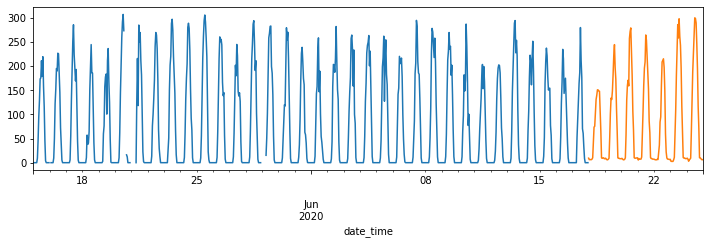

In [128]:
time1a = time1_hour[['date_time','delta_daily_yield2']]
time1b = p1_new_weather[['date_time','delta_daily_yield2']]

time1a.date_time = pd.to_datetime(time1a.date_time)
time1b.date_time = pd.to_datetime(time1b.date_time)

time1a.set_index('date_time',inplace=True)
time1b.set_index('date_time',inplace=True)

plt.figure(figsize=(12,3))
time1a.delta_daily_yield2.plot()
time1b.delta_daily_yield2.plot();